In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib import axes

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func , inspect , and_

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model

Base = automap_base()
Base.prepare(autoload_with=engine)
# reflect the tables


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement =Base.classes.measurement
station = Base.classes.station

In [9]:
inspector = inspect(engine)

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [12]:
# Calculate the date one year from the last date in data set.

last_date_row = session.query(measurement.date).order_by(measurement.date.desc()).first()

last_date = dt.date.fromisoformat(last_date_row[0])

last_date

datetime.date(2017, 8, 23)

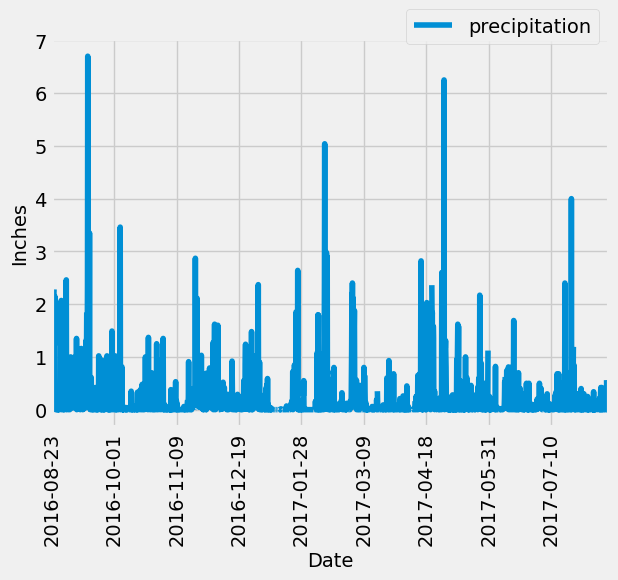

In [73]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the date and precipitation scores

agg_data = session.query(measurement.date , measurement.prcp)\
        .filter(measurement.date.between('2016-08-23' , '2017-08-23'))\
        .order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

precipitation = pd.DataFrame(agg_data  , columns=['Date' , 'precipitation'])
precipitation.set_index('Date' , inplace=True)

# Sort the dataframe by date

precipitation.sort_index(inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data

precipitation.plot(xlim=(0,2230))
plt.xticks(rotation=90)
plt.xlabel('Date' , fontsize=14)
plt.ylabel('Inches' , fontsize=14)
plt.legend(bbox_to_anchor=(1 , 1.1))
plt.show()



In [71]:
precipitation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2230 entries, 2016-08-23 to 2017-08-23
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  2021 non-null   float64
dtypes: float64(1)
memory usage: 34.8+ KB


In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data

precipitation.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
columns = inspector.get_columns('station')

for column in columns:
    print(column["name"] , column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [17]:
columns_2 = inspector.get_columns('measurement')

for column in columns_2:
    print(column["name"] , column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [18]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [19]:
engine.execute('SELECT * FROM station').first()

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)

In [20]:
engine.execute('SELECT * FROM measurement').first()

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)

In [21]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
session.query( station.station , station.name , func.count(measurement.id))\
       .filter(station.station == measurement.station)\
       .group_by(station.name)\
       .order_by(func.count(measurement.id).desc())\
       .all()




[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [22]:
print('Waihee 837.s has the greatest number of observations.')

Waihee 837.s has the greatest number of observations.


In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(func.min(measurement.tobs) , func.max(measurement.tobs), func.avg(measurement.tobs))\
       .filter(station.station == measurement.station)\
       .filter(station.station == 'USC00519281')\
       .all()

   

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

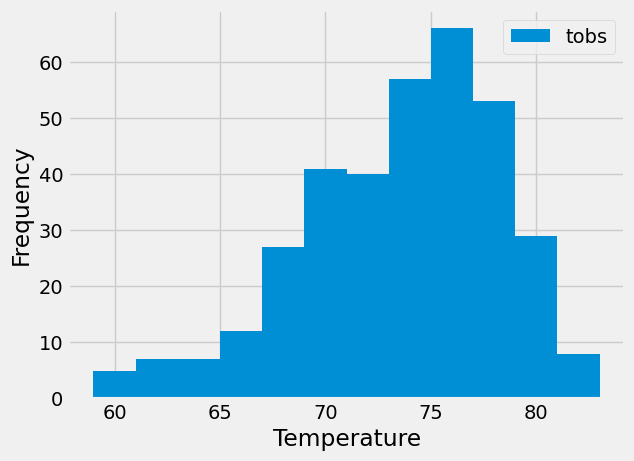

In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

agg_data_2 = session.query(measurement.date , measurement.tobs)\
                    .filter(station.station == measurement.station)\
                    .filter(station.station == 'USC00519281')\
                    .filter(measurement.date.between('2016-08-23' , '2017-08-23'))\
                    .all()


temperature = pd.DataFrame(agg_data_2 ,columns=('Date' , 'tobs'))
temperature.set_index('Date' , inplace=True)

temperature.plot.hist(bins=12)
plt.xlabel('Temperature')



# Close session

In [25]:
# Close Session
session.close()